In [130]:
import numpy as np
import matplotlib.pyplot as plt
t1_original = np.array([1529 for i in range(6)])
t1 = np.array([0.808,0.807,0.813,0.812,0.814,0.809]) + 1529
t2_original = np.array([1540 for i in range(6)])
t2 = np.array([0.095,0.092,0.09,0.093,0.094,0.091]) + 1540
t1, t1_original, t2, t2_original

(array([1529.808, 1529.807, 1529.813, 1529.812, 1529.814, 1529.809]),
 array([1529, 1529, 1529, 1529, 1529, 1529]),
 array([1540.095, 1540.092, 1540.09 , 1540.093, 1540.094, 1540.091]),
 array([1540, 1540, 1540, 1540, 1540, 1540]))

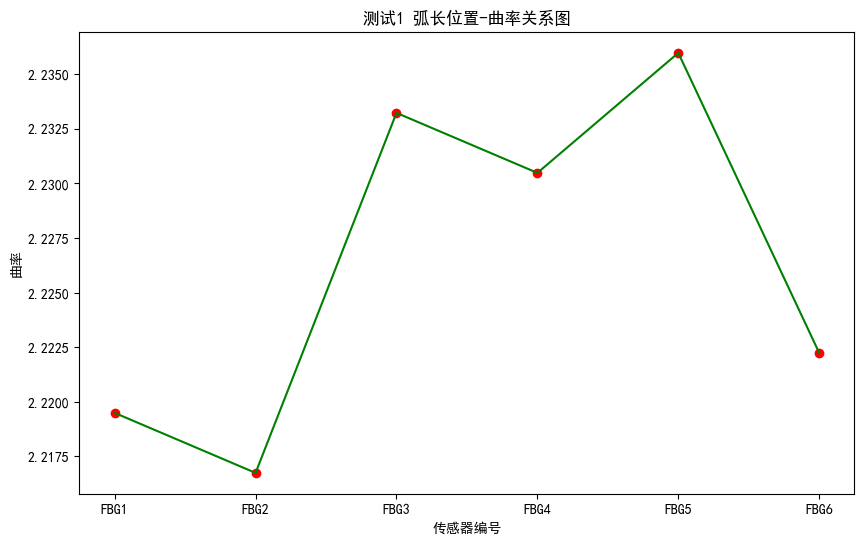

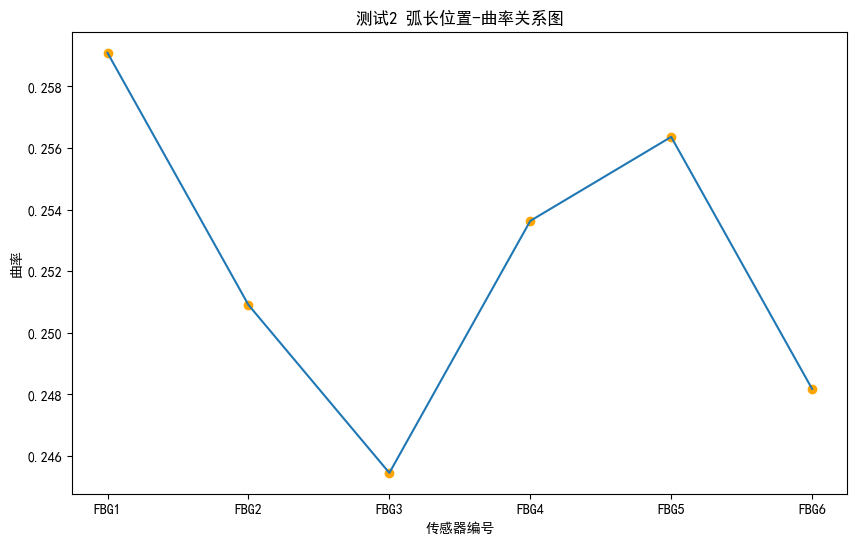

In [131]:
k1s = np.array([4200 * ((i / 1529) - 1) for i in t1])
k2s = np.array([4200 * ((i / 1540) - 1) for i in t2])
# 启用中文图例
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制FBG1至FBG6的位置-曲率关系图
x = ['FBG' + str(i) for i in range(1, 7)]
plt.figure(figsize=(10, 6))
plt.title('测试1 弧长位置-曲率关系图')
plt.xlabel('传感器编号')
plt.ylabel('曲率')
plt.plot(x, k1s, label='曲率',color='green')
plt.scatter(x, k1s,color='red',label='曲率')
plt.figure(figsize=(10, 6))
plt.title('测试2 弧长位置-曲率关系图')
plt.xlabel('传感器编号')
plt.ylabel('曲率')
plt.plot(x, k2s, label='曲率')
plt.scatter(x, k2s,color='orange',label='曲率') 
plt.show()

假设初始点坐标为原点，初始的
水平光纤方向为x轴，垂直方向为y轴，光纤在平面内受力后在初始位置的切线与水平方向的夹角为 45°，请建立模型估算下列表格中横坐标x轴相应位置处的曲率。

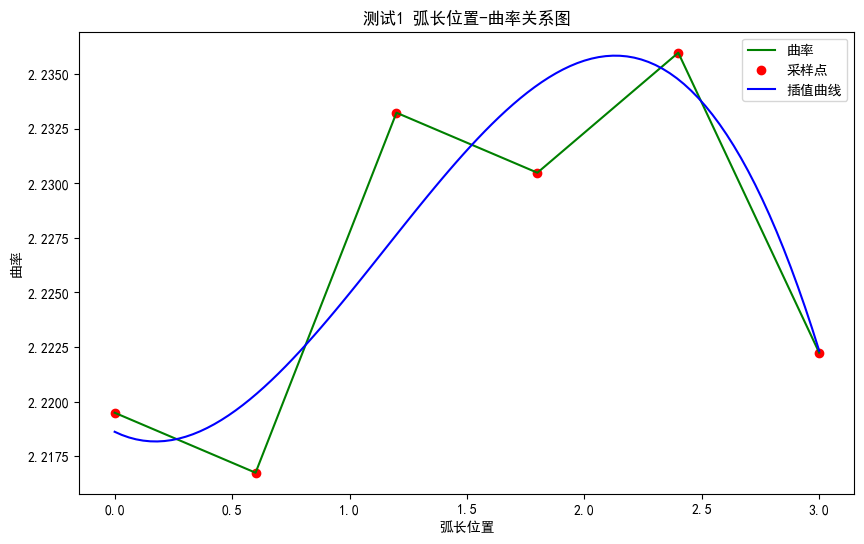

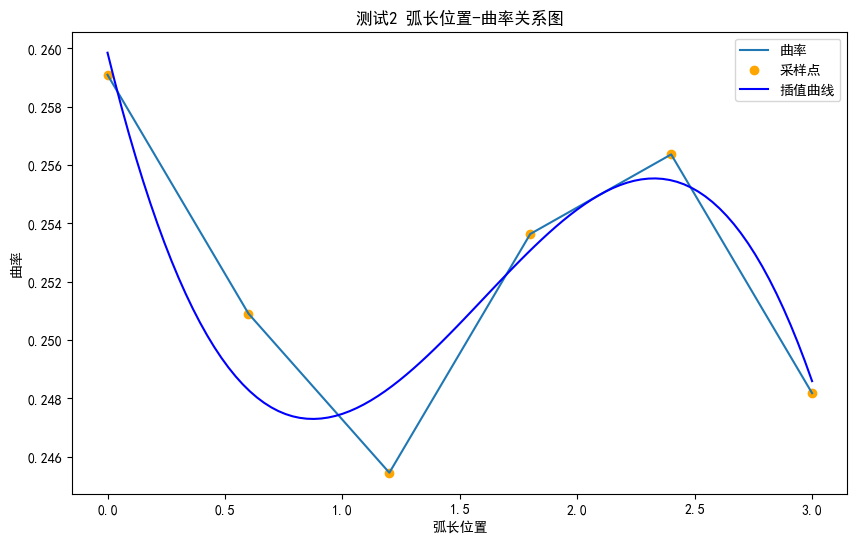

In [132]:
# 采用插值算法对曲率进行连续化，并根据初始条件进行优化
# 多项式插值
from numpy.polynomial.polynomial import Polynomial
x_points = np.array([0,0.6,1.2,1.8,2.4,3])
# 拟合三次多项式
p1 = Polynomial.fit(x_points,k1s, 3)
p2 = Polynomial.fit(x_points,k2s, 3)
# 生成插值点
new_x = np.linspace(0, 3, 100)
# 计算插值点的值
y1_poly = p1(new_x)
y2_poly = p2(new_x)
plt.figure(figsize=(10, 6))
plt.title('测试1 弧长位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(x_points, k1s, label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='采样点')
plt.plot(new_x, y1_poly, label='插值曲线',color='blue')
plt.legend()
plt.figure(figsize=(10, 6))
plt.title('测试2 弧长位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(x_points, k2s, label='曲率')
plt.scatter(x_points, k2s,color='orange',label='采样点')
plt.plot(new_x, y2_poly, label='插值曲线',color='blue')
plt.legend()
plt.show()



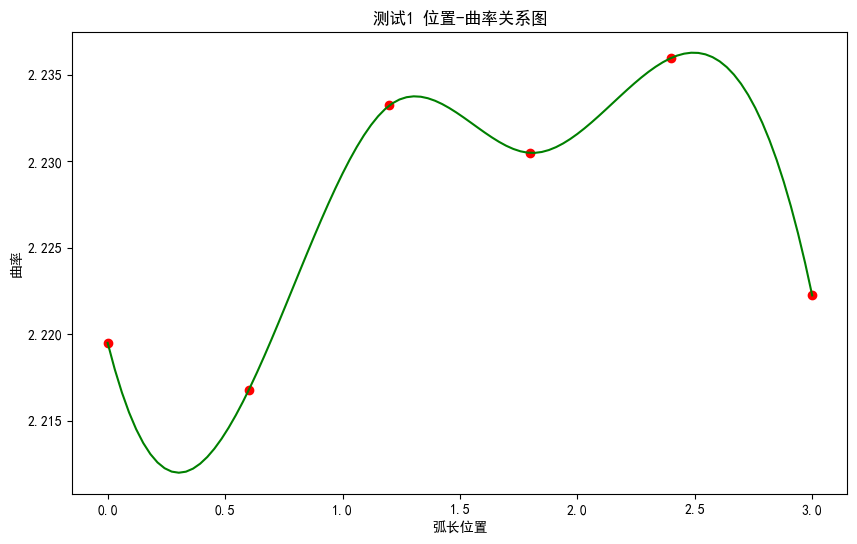

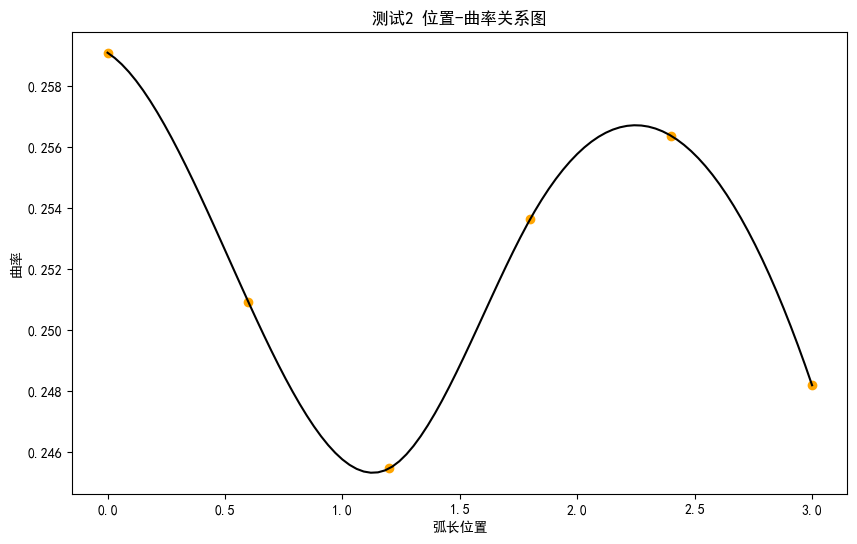

In [133]:
# 样条插值

from scipy.interpolate import CubicSpline
cs1 = CubicSpline(x_points, k1s)
cs2 = CubicSpline(x_points, k2s)
xnew = np.linspace(0, 3, 100)
plt.figure(figsize=(10, 6))
plt.title('测试1 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs1(xnew), label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='曲率')
plt.figure(figsize=(10, 6))
plt.title('测试2 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs2(xnew), label='曲率',color='black')
plt.scatter(x_points, k2s,color='orange',label='曲率')
plt.show()



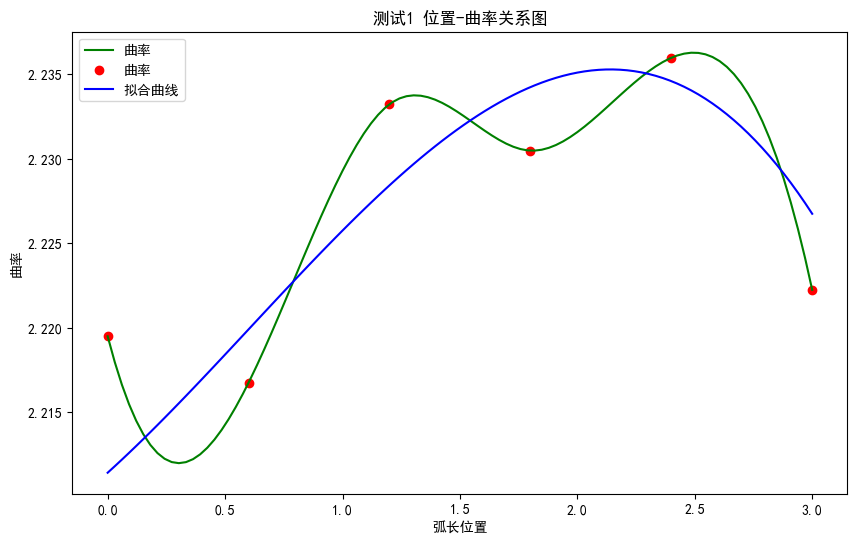

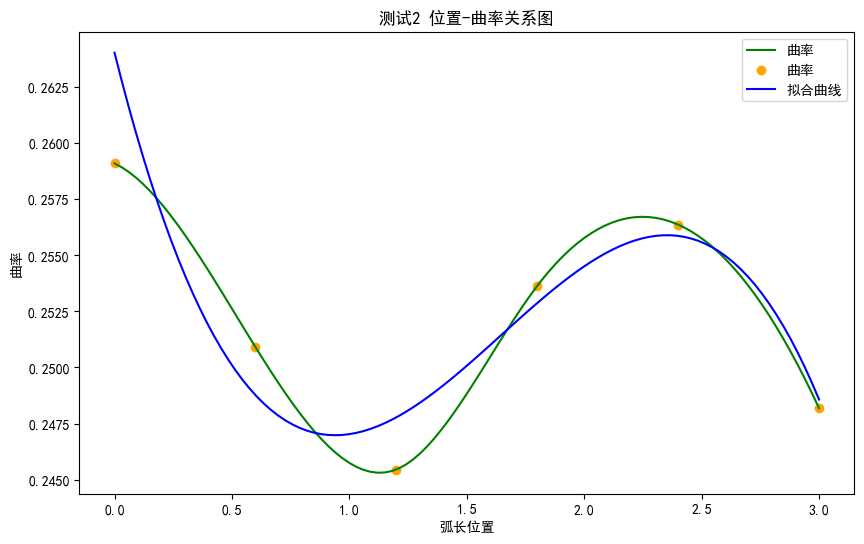

In [134]:
# 拟合弧长位置-曲率关系
from scipy.optimize import curve_fit
# 使用三次多项式拟合
def func(x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3
popt1, pcov1 = curve_fit(func, xnew, cs1(xnew))
popt2, pcov2 = curve_fit(func, xnew, cs2(xnew))
plt.figure(figsize=(10, 6))
plt.title('测试1 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs1(xnew), label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='曲率')
plt.plot(xnew, func(xnew, *popt1), label='拟合曲线',color='blue')
plt.legend()
plt.figure(figsize=(10, 6))
plt.title('测试2 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs2(xnew), label='曲率',color='green')
plt.scatter(x_points, k2s,color='orange',label='曲率')
plt.plot(xnew, func(xnew, *popt2), label='拟合曲线',color='blue')
plt.legend()
plt.show()



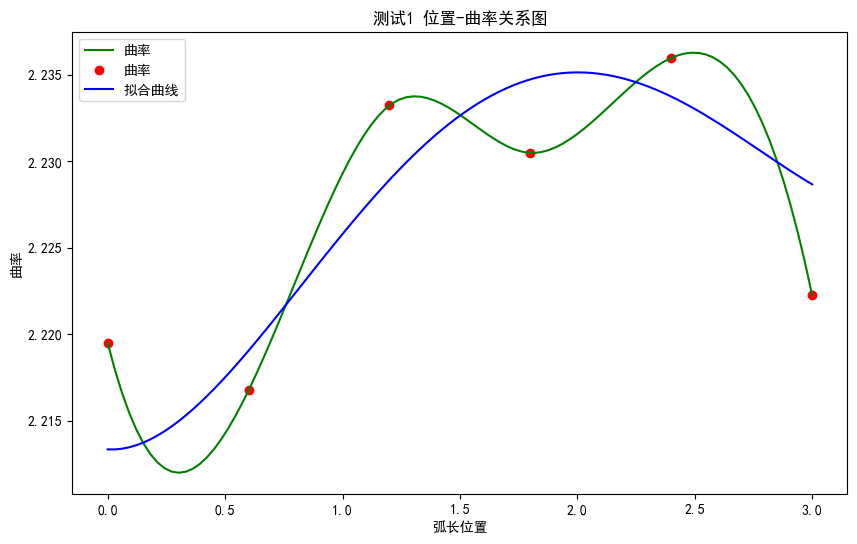

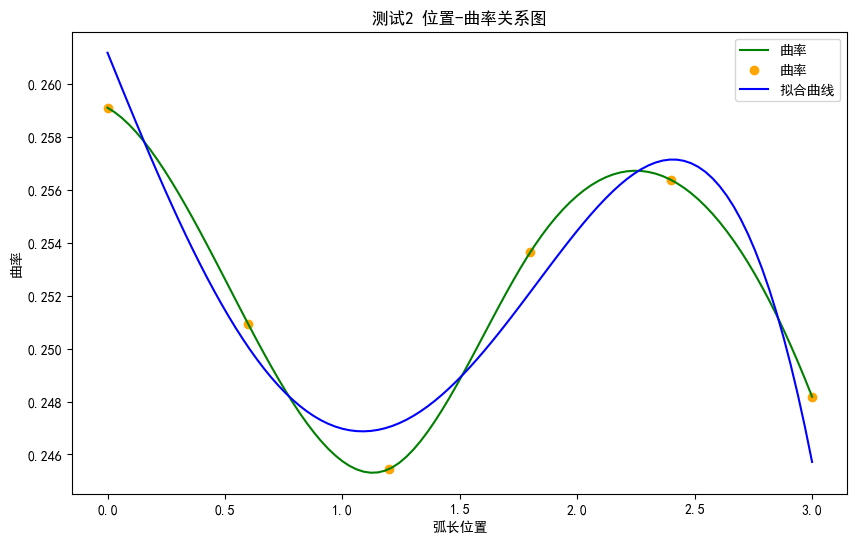

In [135]:

# 使用四次多项式拟合
def func(x, a, b, c, d, e):
    return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4
popt1, pcov1 = curve_fit(func, xnew, cs1(xnew))
popt2, pcov2 = curve_fit(func, xnew, cs2(xnew))
plt.figure(figsize=(10, 6))
plt.title('测试1 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs1(xnew), label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='曲率')
plt.plot(xnew, func(xnew, *popt1), label='拟合曲线',color='blue')
plt.legend()
plt.figure(figsize=(10, 6))
plt.title('测试2 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs2(xnew), label='曲率',color='green')
plt.scatter(x_points, k2s,color='orange',label='曲率')
plt.plot(xnew, func(xnew, *popt2), label='拟合曲线',color='blue')
plt.legend()
plt.show()

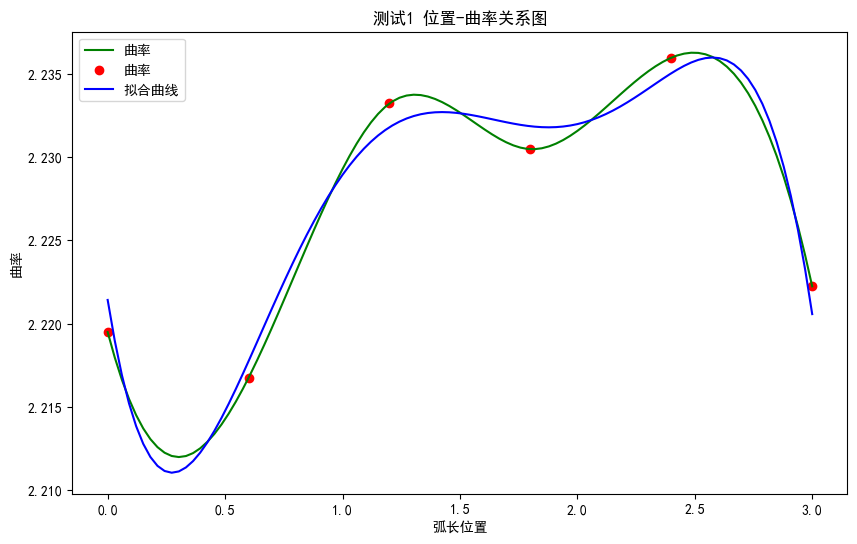

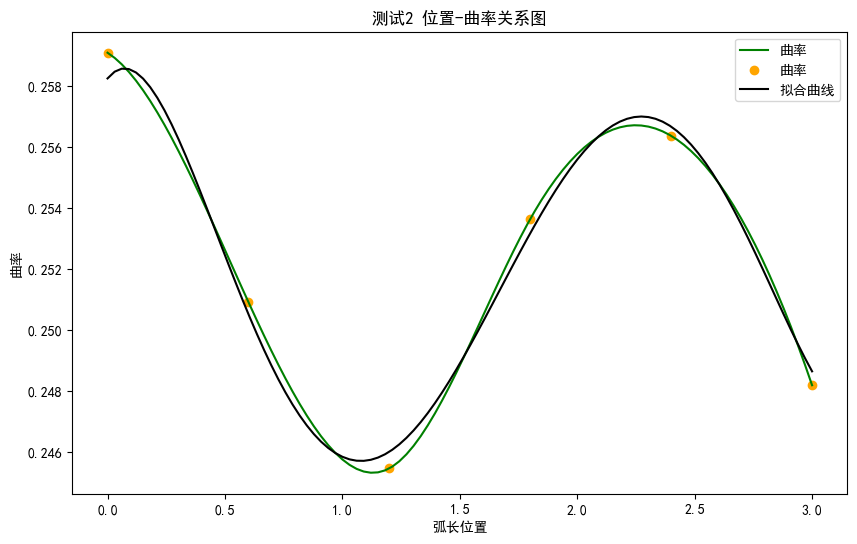

In [136]:

# 使用五次多项式拟合
def func(x, a, b, c, d, e, f):
    return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5
popt1, pcov1 = curve_fit(func, xnew, cs1(xnew))
popt2, pcov2 = curve_fit(func, xnew, cs2(xnew))
plt.figure(figsize=(10, 6))
plt.title('测试1 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs1(xnew), label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='曲率')
plt.plot(xnew, func(xnew, *popt1), label='拟合曲线',color='blue')
plt.legend()
plt.figure(figsize=(10, 6))
plt.title('测试2 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs2(xnew), label='曲率',color='green')
plt.scatter(x_points, k2s,color='orange',label='曲率')
plt.plot(xnew, func(xnew, *popt2), label='拟合曲线',color='black')
plt.legend()
plt.show()

In [137]:
# 输出拟合参数
print('测试1 拟合参数:', popt1)
print('测试2 拟合参数:', popt2)
# 光纤总长度
s = 3
x_predict_pts = [0.3,0.4,0.5,0.6,0.7]
k1_predict = cs1(x_predict_pts)
k2_predict = cs2(x_predict_pts)
print('测试1 预测曲率:', k1_predict)
print('测试2 预测曲率:', k2_predict)

测试1 拟合参数: [ 2.22141911 -0.08778512  0.23123233 -0.19809915  0.07146177 -0.00929347]
测试2 拟合参数: [ 0.2582474   0.00948156 -0.0738258   0.0763626  -0.02778706  0.0033553 ]
测试1 预测曲率: [2.21198169 2.21257402 2.21425324 2.21674297 2.21976681]
测试2 预测曲率: [0.25589773 0.25431201 0.25261855 0.25090909 0.24927539]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


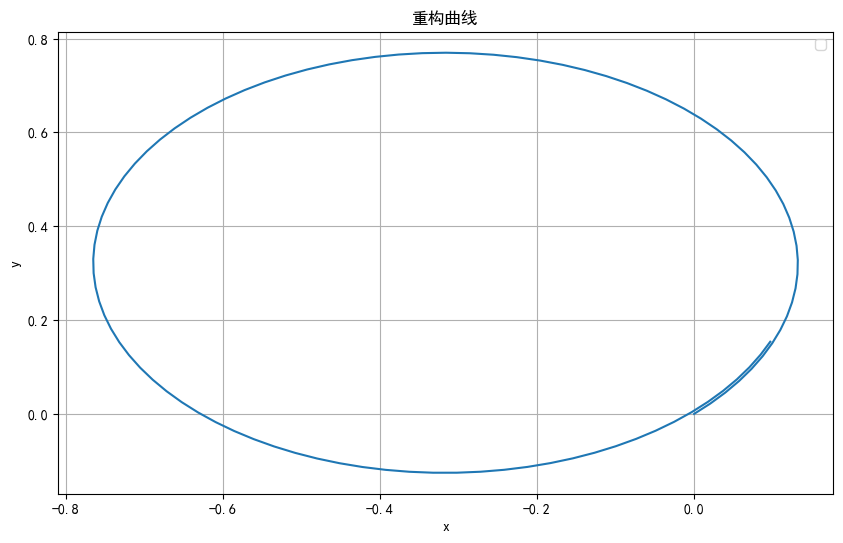

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# 定义弧长-曲率关系
def kappa(s):
    return func(s, *popt1)
# 定义初始条件
theta0 = np.pi / 4  # 初始角度
x0, y0 = 0, 0  # 初始点

# 定义弧长范围
s = np.linspace(0, 3, 100)

# 计算切线角度 theta(s)
theta = cumtrapz(kappa(s), s, initial=0) + theta0

# 计算参数方程 x(s) 和 y(s)
x = x0 + cumtrapz(np.cos(theta), s, initial=0)
y = y0 + cumtrapz(np.sin(theta), s, initial=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('重构曲线')
plt.legend()
plt.grid()
plt.show()

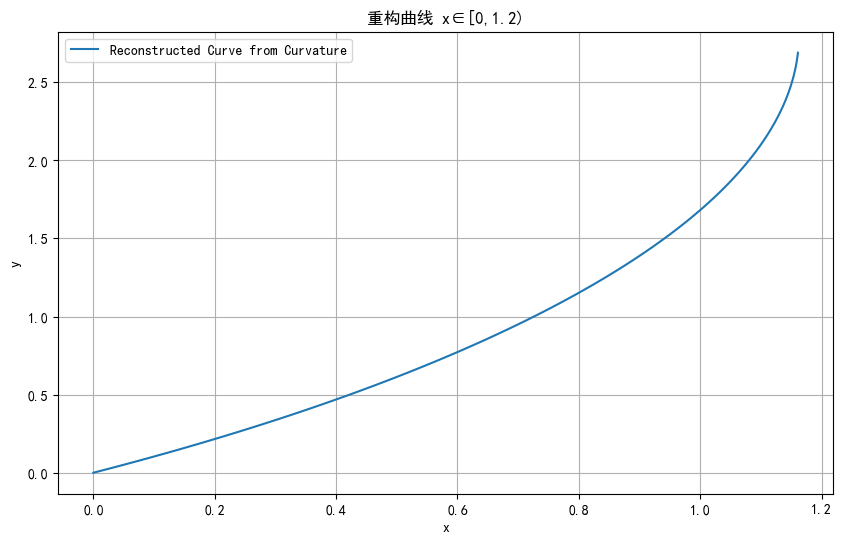

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# 定义弧长-曲率关系
def kappa(s):
    return func(s, *popt2)

# 定义初始条件
theta0 = np.pi / 4  # 初始角度
x0, y0 = 0, 0  # 初始点

# 定义弧长范围
s = np.linspace(0,3, 100)

# 计算切线角度 theta(s)
theta = cumtrapz(kappa(s), s, initial=0) + theta0

# 计算参数方程 x(s) 和 y(s)
x = x0 + cumtrapz(np.cos(theta), s, initial=0)
y = y0 + cumtrapz(np.sin(theta), s, initial=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Reconstructed Curve from Curvature')
plt.xlabel('x')
plt.ylabel('y')
plt.title('重构曲线 x∈[0,1.2)')
plt.legend()
plt.grid(True)
plt.show()
